In [1]:
import os
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("combined-season-data.csv");

In [5]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,threat_pgw,threat_rlf,threat_rsf,total_points_pgw,total_points_rlf,total_points_rsf,yellow_cards_pgw,yellow_cards_rlf,yellow_cards_rsf,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [6]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
assists_rlf               int64
assists_rsf               int64
bonus_pgw               float64
bonus_rlf                 int64
bonus_rsf                 int64
bps_pgw                 float64
bps_rlf                   int64
bps_rsf                   int64
clean_sheets_pgw        float64
clean_sheets_rlf          int64
clean_sheets_rsf          int64
creativity_pgw          float64
creativity_rlf          float64
creativity_rsf          float64
goals_conceded_pgw      float64
goals_conceded_rlf        int64
goals_conceded_rsf        int64
goals_scored_pgw        float64
goals_scored_rlf          int64
goals_scored_rsf          int64
                         ...   
minutes_

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,69047.0,2017.052312,0.903083,2016.0,2016.0,2017.0,2018.0,2019.00
GW,69047.0,19.487769,11.343298,1.0,9.0,20.0,30.0,38.00
at_home,69047.0,0.498588,0.500002,0.0,0.0,0.0,1.0,1.00
player_id,69047.0,487.164714,295.528292,1.0,239.0,478.0,701.0,1211.00
opponent_id,69047.0,12.015294,7.253878,1.0,5.0,11.0,18.0,29.00
champion_ls,69047.0,0.050560,0.219099,0.0,0.0,0.0,0.0,1.00
top5_ls,69047.0,0.251799,0.434050,0.0,0.0,0.0,1.0,1.00
bottom5_ls,69047.0,0.248657,0.432238,0.0,0.0,0.0,0.0,1.00
promoted_ts,69047.0,0.149261,0.356348,0.0,0.0,0.0,0.0,1.00
assists_pgw,69047.0,0.037221,0.204883,0.0,0.0,0.0,0.0,3.00


In [8]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [9]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"].values.reshape(-1,1);

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=random_state)

In [11]:
regressor = LinearRegression(normalize=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(regressor.coef_[0, ])})

In [31]:
coefficients.sort_values(["Coefficients"], ascending=False)

,Feature,Coefficients
42,penalties_missed_rsf,1.044138
38,own_goals_rlf,0.399638
39,own_goals_rsf,0.356470
6,promoted_ts,0.196412
47,red_cards_rlf,0.189803
40,penalties_missed_pgw,0.156083
0,at_home,0.148739
52,saves_pgw,0.135628
37,own_goals_pgw,0.120663
55,threat_pgw,0.112272


In [14]:
y_pred = regressor.predict(X_test)

In [15]:
pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [16]:
pred_df["in_range"] = pred_df.apply(lambda row: True if (row["Actual"] - row["Predicted"]) <= 1 else False, axis=1)

In [17]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.87


In [18]:
pred_df.head(25)

,Actual,Predicted,in_range
0,0.0,0.410587,True
1,0.0,0.506959,True
2,0.0,0.562632,True
3,0.0,1.888498,True
4,0.0,0.175533,True
5,2.0,2.335749,True
6,8.0,2.084226,False
7,2.0,0.045561,False
8,0.0,0.456146,True
9,1.0,0.500377,True


In [19]:
test_df = pred_df.head(25)

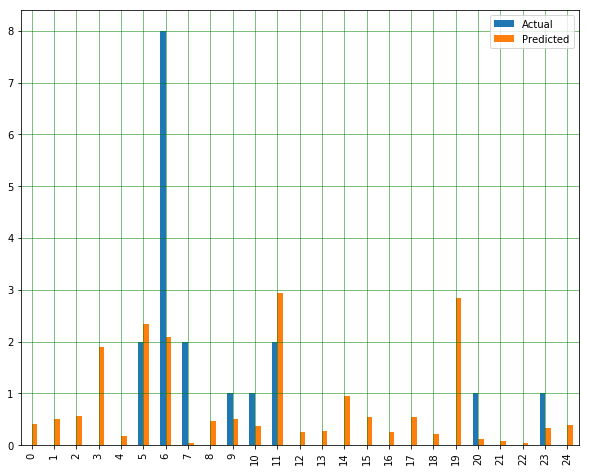

In [20]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9902684046392758
R2 score: 0.27852559872650273
Mean Squared Error: 2.560243608153666
Root Mean Squared Error: 1.600076125737043


In [22]:
player_id_df = pd.read_csv("player_id_map.csv");
team_id_df = pd.read_csv("team_id_map.csv");

In [23]:
# load and the test weekly fpl scrape
gw=7
weekly_scrape = pd.read_csv("gw{}-fpl-data.csv".format(gw));

In [24]:
weekly_scrape = weekly_scrape[X_test.columns]

In [25]:
y_pred_weekly = regressor.predict(weekly_scrape);

In [26]:
y_pred_weekly_df = pd.DataFrame({'player_id': list(weekly_scrape["player_id"]), 'predicted': y_pred_weekly.flatten()})

In [27]:
player_names = [];
opponent_names = [];

for index, row in weekly_scrape.iterrows():
    player_id = row["player_id"];
    opponent_id = row["opponent_id"];
    
    player_names.append(player_id_df[player_id_df["player_id"] == player_id]["actual_name"].iloc[0]);
    opponent_names.append(team_id_df[team_id_df["team_id"] == opponent_id]["team_name"].iloc[0]);

In [28]:
y_pred_weekly_df["player_name"] = player_names;
y_pred_weekly_df["opponent"] = opponent_names;

In [29]:
y_pred_weekly_df = y_pred_weekly_df[["player_id", "player_name", "opponent", "predicted"]];

In [30]:
y_pred_weekly_df.sort_values(["predicted"], ascending=False)

,player_id,player_name,opponent,predicted
4,977,Issa Diop,Bournemouth,3.053300
2,648,Trent Alexander-Arnold,Sheffield United,2.742971
9,1176,Mason Mount,Brighton and Hove Albion,2.374633
10,385,Kevin De Bruyne,Everton,2.364355
13,1204,Teemu Pukki,Crystal Palace,2.350963
6,1154,John Lundstram,Liverpool,2.258374
3,514,Nicolás Otamendi,Everton,2.234713
11,1206,Todd Cantwell,Crystal Palace,2.179612
8,267,Harry Wilson,West Ham United,2.121178
14,858,Pierre-Emerick Aubameyang,Manchester United,1.986297
